In [1]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
f1 = pd.read_csv('C:\\ny_pred_cyc.csv')
df_cyc = pd.DataFrame(f1)

In [3]:
f2 = pd.read_csv('C:\\ny_pred_dum.csv')
df_dum = pd.DataFrame(f2)

In [4]:
f3 = pd.read_csv('C:\\ny_pred_num.csv')
df_num = pd.DataFrame(f3)

In [5]:
df_cyc.head(5)

,Lasso Regression,Ridge Regression,Random Forest,Xtreme Gradient Boost,Support Vector Machine,Multi-Layer Perceptron,Target,date
0,14526.058138,14519.928061,14688.063528,14772.162,15012.491336,14519.981850,14769,2019-02-06 04:00:00
1,15024.143087,15019.361391,15678.873942,15683.323,15761.314155,15019.724304,15757,2019-02-06 05:00:00
2,16179.803586,16178.614654,17481.445126,17506.002,16979.491081,16179.809398,17565,2019-02-06 06:00:00
3,18109.338123,18109.723850,18688.244519,18675.643,18634.522495,18112.324669,18617,2019-02-06 07:00:00
4,19257.315254,19256.795448,19039.486728,19115.477,19426.061818,19259.835595,18801,2019-02-06 08:00:00


In [6]:
df_dum.head(5)

,Lasso Regression,Ridge Regression,Random Forest,Xtreme Gradient Boost,Support Vector Machine,Multi-Layer Perceptron,Target,date
0,14547.988737,14565.853449,14708.963351,14721.568,15438.968802,14715.316325,14769,2019-02-06 04:00:00
1,15375.258227,15390.817672,15661.263462,15696.622,16066.816253,15698.911618,15757,2019-02-06 05:00:00
2,16967.325302,16983.567035,17466.101831,17398.195,17131.760466,17455.396944,17565,2019-02-06 06:00:00
3,18681.748564,18699.977302,18669.752421,18630.648,18073.691516,18731.186016,18617,2019-02-06 07:00:00
4,19407.925340,19422.973980,19042.051507,19037.852,18520.401758,19093.868545,18801,2019-02-06 08:00:00


In [7]:
df_num.head(5)

,Lasso Regression,Ridge Regression,Random Forest,Xtreme Gradient Boost,Support Vector Machine,Multi-Layer Perceptron,Target,date
0,14539.550036,14546.219623,14719.298913,14712.027,15210.609054,14670.821201,14769,2019-02-06 04:00:00
1,14846.590515,14853.622959,15683.896739,15737.495,15489.769970,15625.884068,15757,2019-02-06 05:00:00
2,15798.968930,15805.423911,17470.951087,17427.969,16163.639059,16776.851313,17565,2019-02-06 06:00:00
3,17547.102982,17553.753895,18675.902174,18720.617,17376.200481,18444.083077,18617,2019-02-06 07:00:00
4,18573.093266,18580.375206,19022.190217,19060.799,18145.109873,19338.850603,18801,2019-02-06 08:00:00


# Select Predictions

In [8]:
df_cyc.drop(['Random Forest', 'Support Vector Machine'], axis=1, inplace=True)

In [9]:
df_dum.drop(['Random Forest', 'Support Vector Machine', 'Target'], axis=1, inplace=True)

In [10]:
df_num.drop(['Random Forest', 'Support Vector Machine', 'Target'], axis=1, inplace=True)

### Merging all predictions into single DF

In [11]:
df = pd.merge(df_cyc, df_dum, on=['date'])

In [12]:
df = pd.merge(df, df_num, on=['date'])

In [13]:
df['date'] = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

In [14]:
df.head(5)

,Lasso Regression_x,Ridge Regression_x,Xtreme Gradient Boost_x,Multi-Layer Perceptron_x,Target,Lasso Regression_y,Ridge Regression_y,Xtreme Gradient Boost_y,Multi-Layer Perceptron_y,Lasso Regression,Ridge Regression,Xtreme Gradient Boost,Multi-Layer Perceptron
date,,,,,,,,,,,,,
2019-02-06 04:00:00,14526.058138,14519.928061,14772.162,14519.981850,14769,14547.988737,14565.853449,14721.568,14715.316325,14539.550036,14546.219623,14712.027,14670.821201
2019-02-06 05:00:00,15024.143087,15019.361391,15683.323,15019.724304,15757,15375.258227,15390.817672,15696.622,15698.911618,14846.590515,14853.622959,15737.495,15625.884068
2019-02-06 06:00:00,16179.803586,16178.614654,17506.002,16179.809398,17565,16967.325302,16983.567035,17398.195,17455.396944,15798.968930,15805.423911,17427.969,16776.851313
2019-02-06 07:00:00,18109.338123,18109.723850,18675.643,18112.324669,18617,18681.748564,18699.977302,18630.648,18731.186016,17547.102982,17553.753895,18720.617,18444.083077
2019-02-06 08:00:00,19257.315254,19256.795448,19115.477,19259.835595,18801,19407.925340,19422.973980,19037.852,19093.868545,18573.093266,18580.375206,19060.799,19338.850603


In [15]:
df.columns = ['Lasso Cyclic', 'Ridge Cyclic', 'XGB Cyclic', 'MLP Cyclic', 'Target', 
              'Lasso Dummy', 'Ridge Dummy', 'XGB Dummy', 'MLP Dummy', 'Lasso Numeric',
              'Ridge Numeric', 'XGB Numeric', 'MLP Numeric']

In [16]:
df.head(5)

,Lasso Cyclic,Ridge Cyclic,XGB Cyclic,MLP Cyclic,Target,Lasso Dummy,Ridge Dummy,XGB Dummy,MLP Dummy,Lasso Numeric,Ridge Numeric,XGB Numeric,MLP Numeric
date,,,,,,,,,,,,,
2019-02-06 04:00:00,14526.058138,14519.928061,14772.162,14519.981850,14769,14547.988737,14565.853449,14721.568,14715.316325,14539.550036,14546.219623,14712.027,14670.821201
2019-02-06 05:00:00,15024.143087,15019.361391,15683.323,15019.724304,15757,15375.258227,15390.817672,15696.622,15698.911618,14846.590515,14853.622959,15737.495,15625.884068
2019-02-06 06:00:00,16179.803586,16178.614654,17506.002,16179.809398,17565,16967.325302,16983.567035,17398.195,17455.396944,15798.968930,15805.423911,17427.969,16776.851313
2019-02-06 07:00:00,18109.338123,18109.723850,18675.643,18112.324669,18617,18681.748564,18699.977302,18630.648,18731.186016,17547.102982,17553.753895,18720.617,18444.083077
2019-02-06 08:00:00,19257.315254,19256.795448,19115.477,19259.835595,18801,19407.925340,19422.973980,19037.852,19093.868545,18573.093266,18580.375206,19060.799,19338.850603


# Charts of Predicted Values

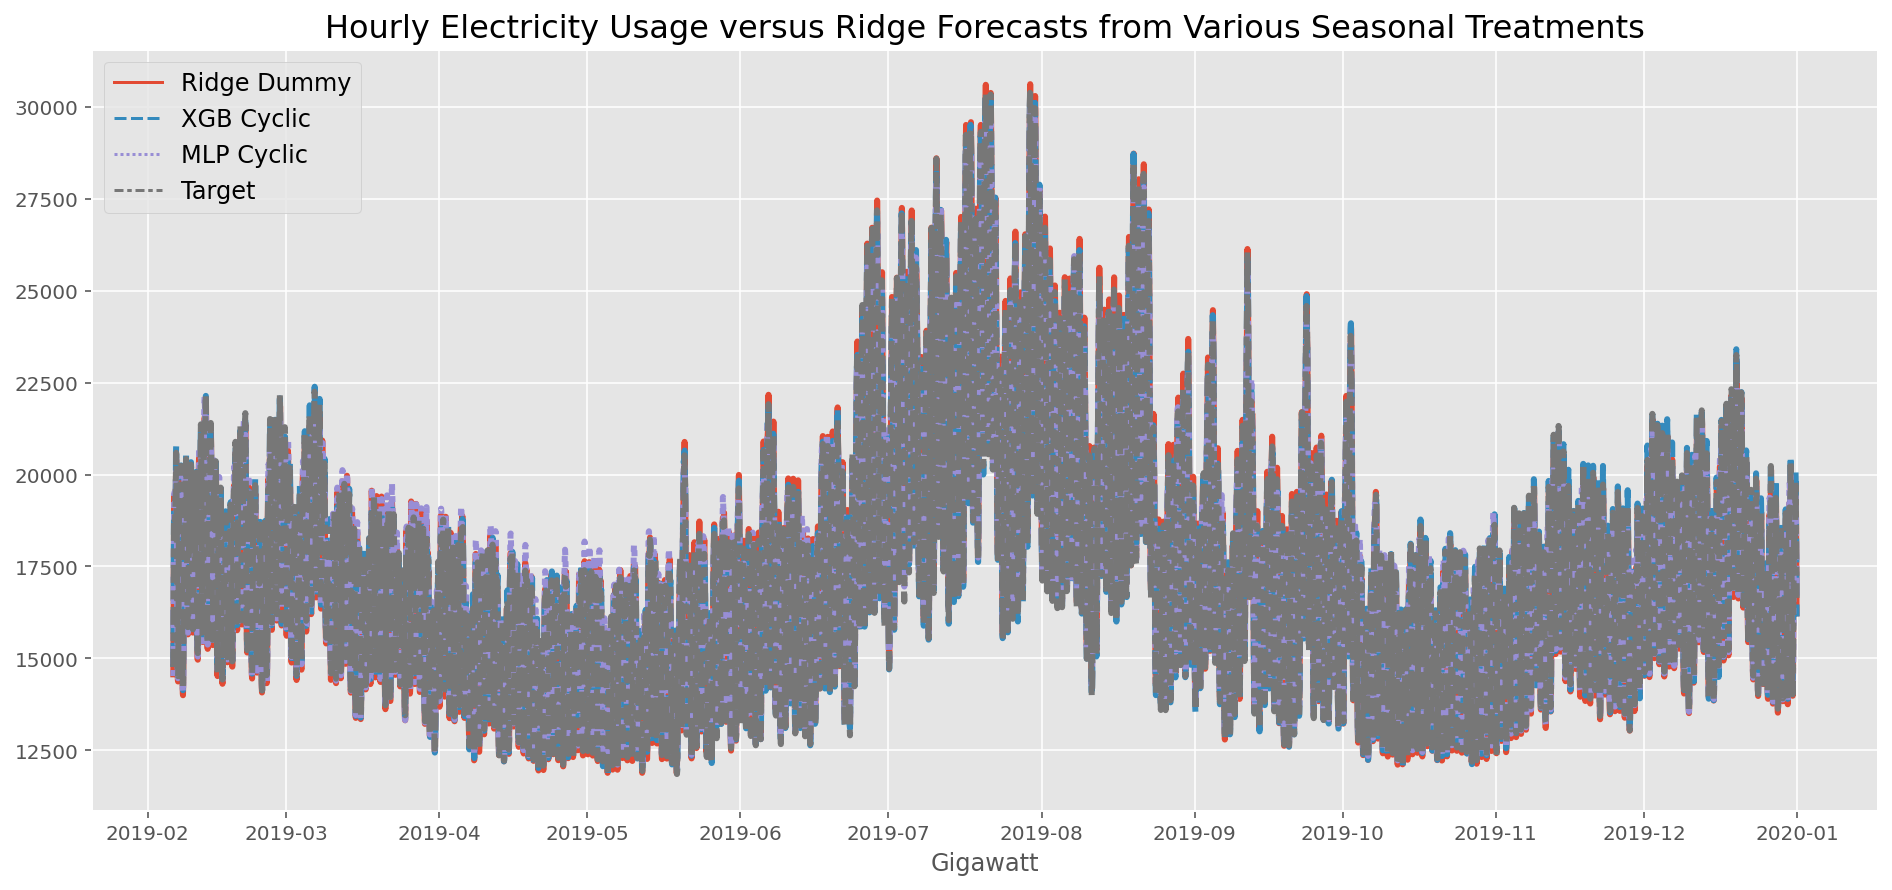

In [17]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['Ridge Dummy', 'XGB Cyclic', 'MLP Cyclic', 'Target']],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly Electricity Usage versus Ridge Forecasts from Various Seasonal Treatments', fontsize=16)
plt.xlabel('Gigawatt', fontsize=12);

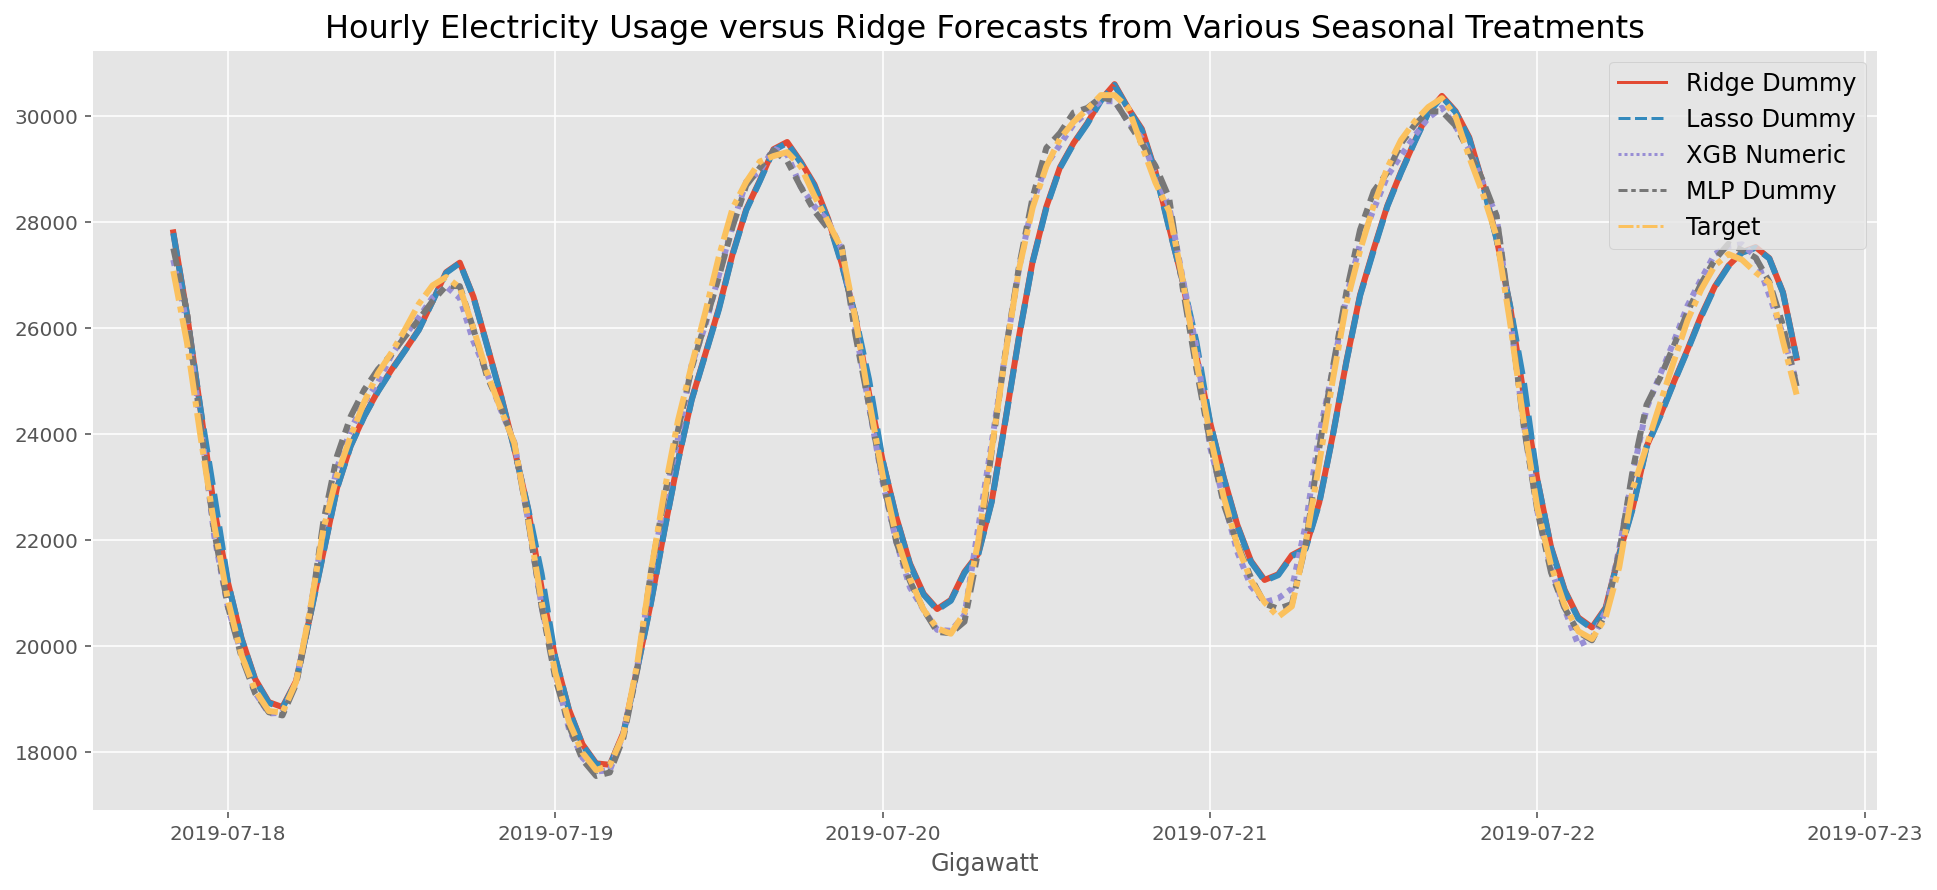

In [18]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['Ridge Dummy', 'Lasso Dummy', 'XGB Numeric', 'MLP Dummy', 'Target']].iloc[3880:4000], 
             ax=ax, linewidth=3)
plt.legend(loc='upper right', fontsize=12)
plt.title('Hourly Electricity Usage versus Ridge Forecasts from Various Seasonal Treatments', fontsize=16)
plt.xlabel('Gigawatt', fontsize=12);

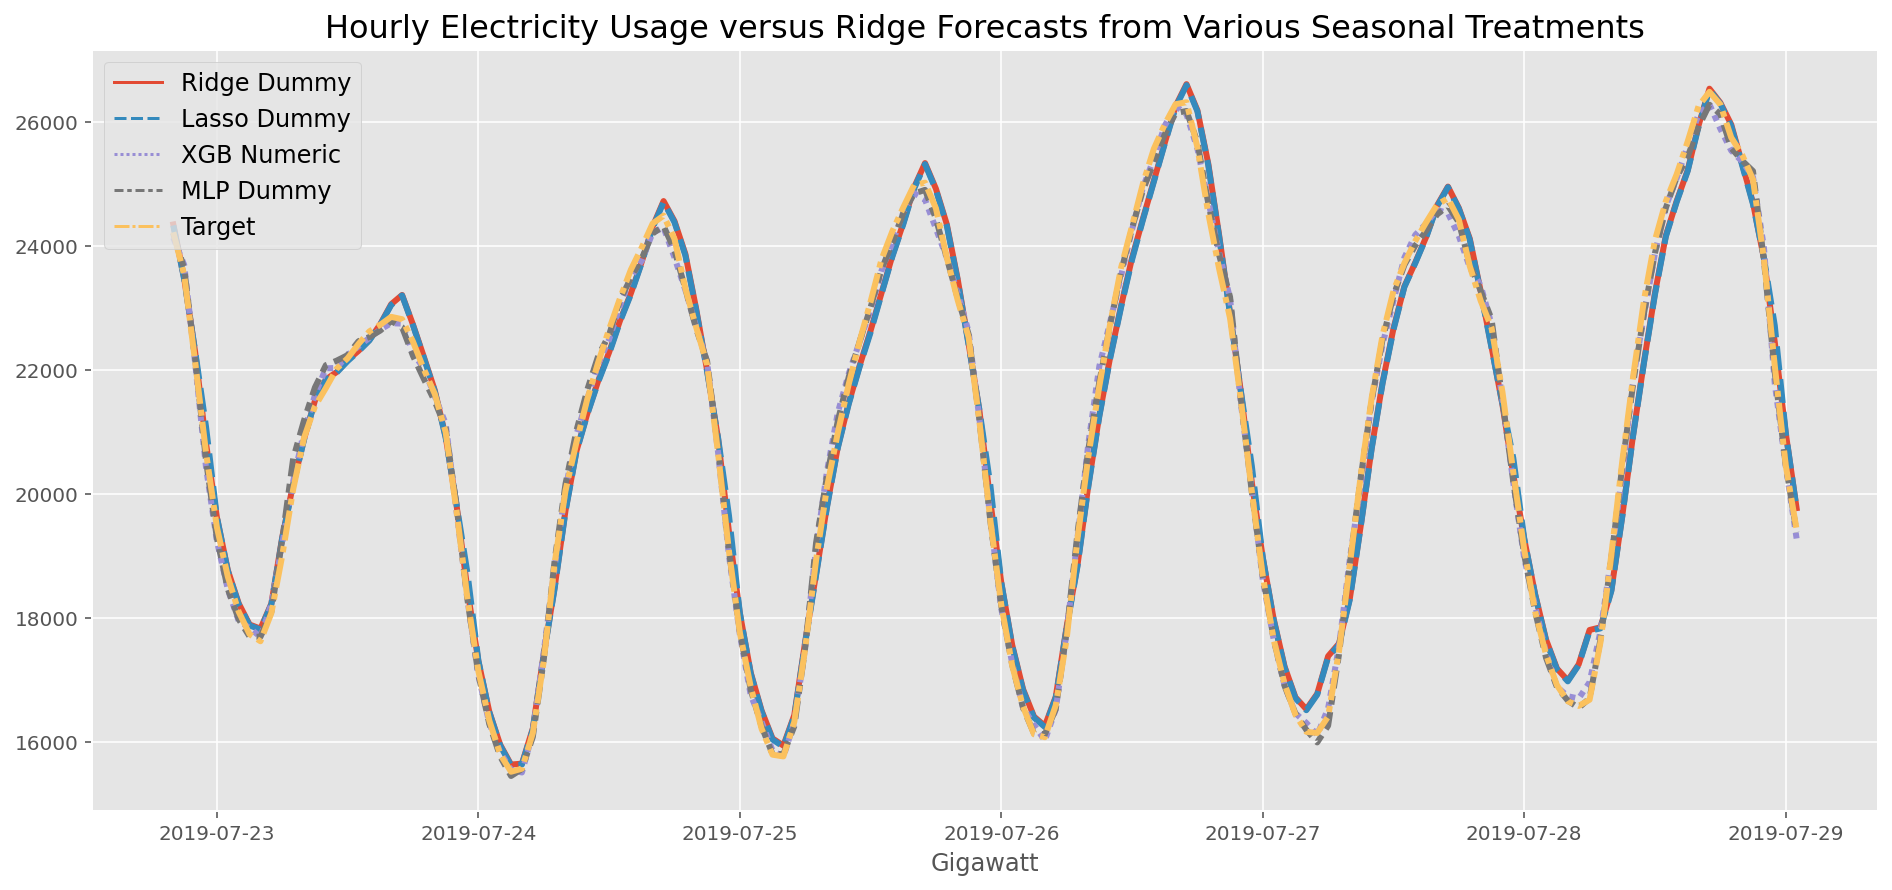

In [19]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['Ridge Dummy', 'Lasso Dummy', 'XGB Numeric', 'MLP Dummy', 'Target']].iloc[4000:4150],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly Electricity Usage versus Ridge Forecasts from Various Seasonal Treatments', fontsize=16)
plt.xlabel('Gigawatt', fontsize=12);

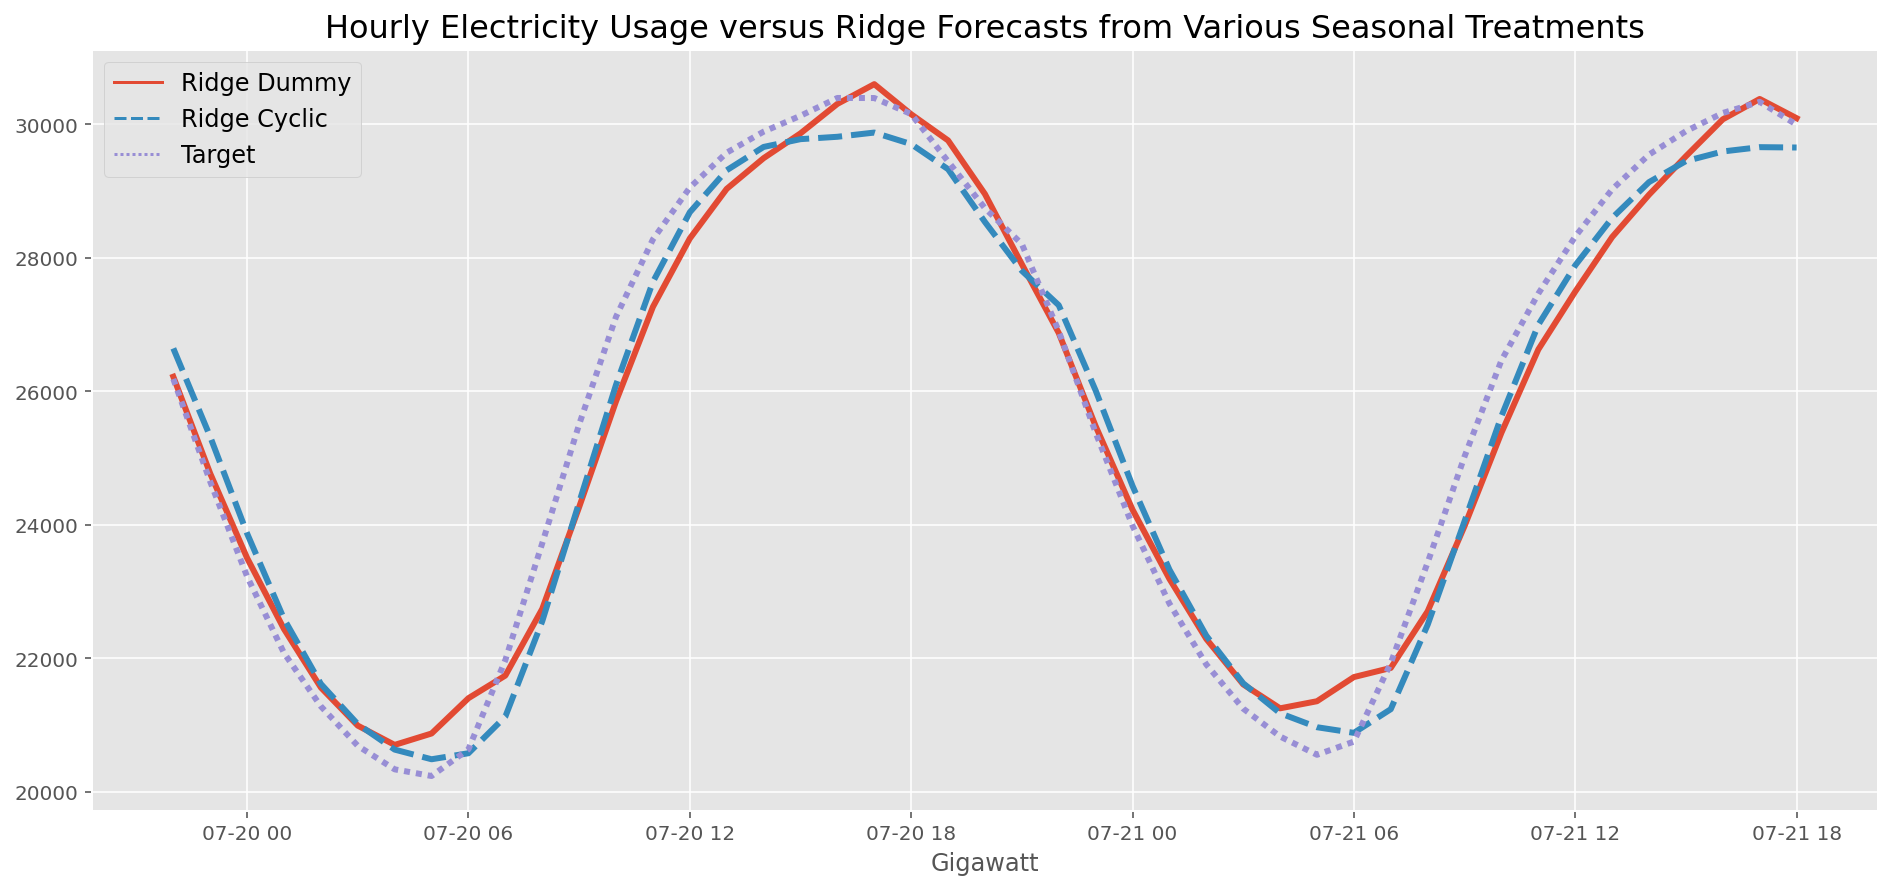

In [20]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['Ridge Dummy', 'Ridge Cyclic', 'Target']].iloc[3930:3975],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly Electricity Usage versus Ridge Forecasts from Various Seasonal Treatments', fontsize=16)
plt.xlabel('Gigawatt', fontsize=12);

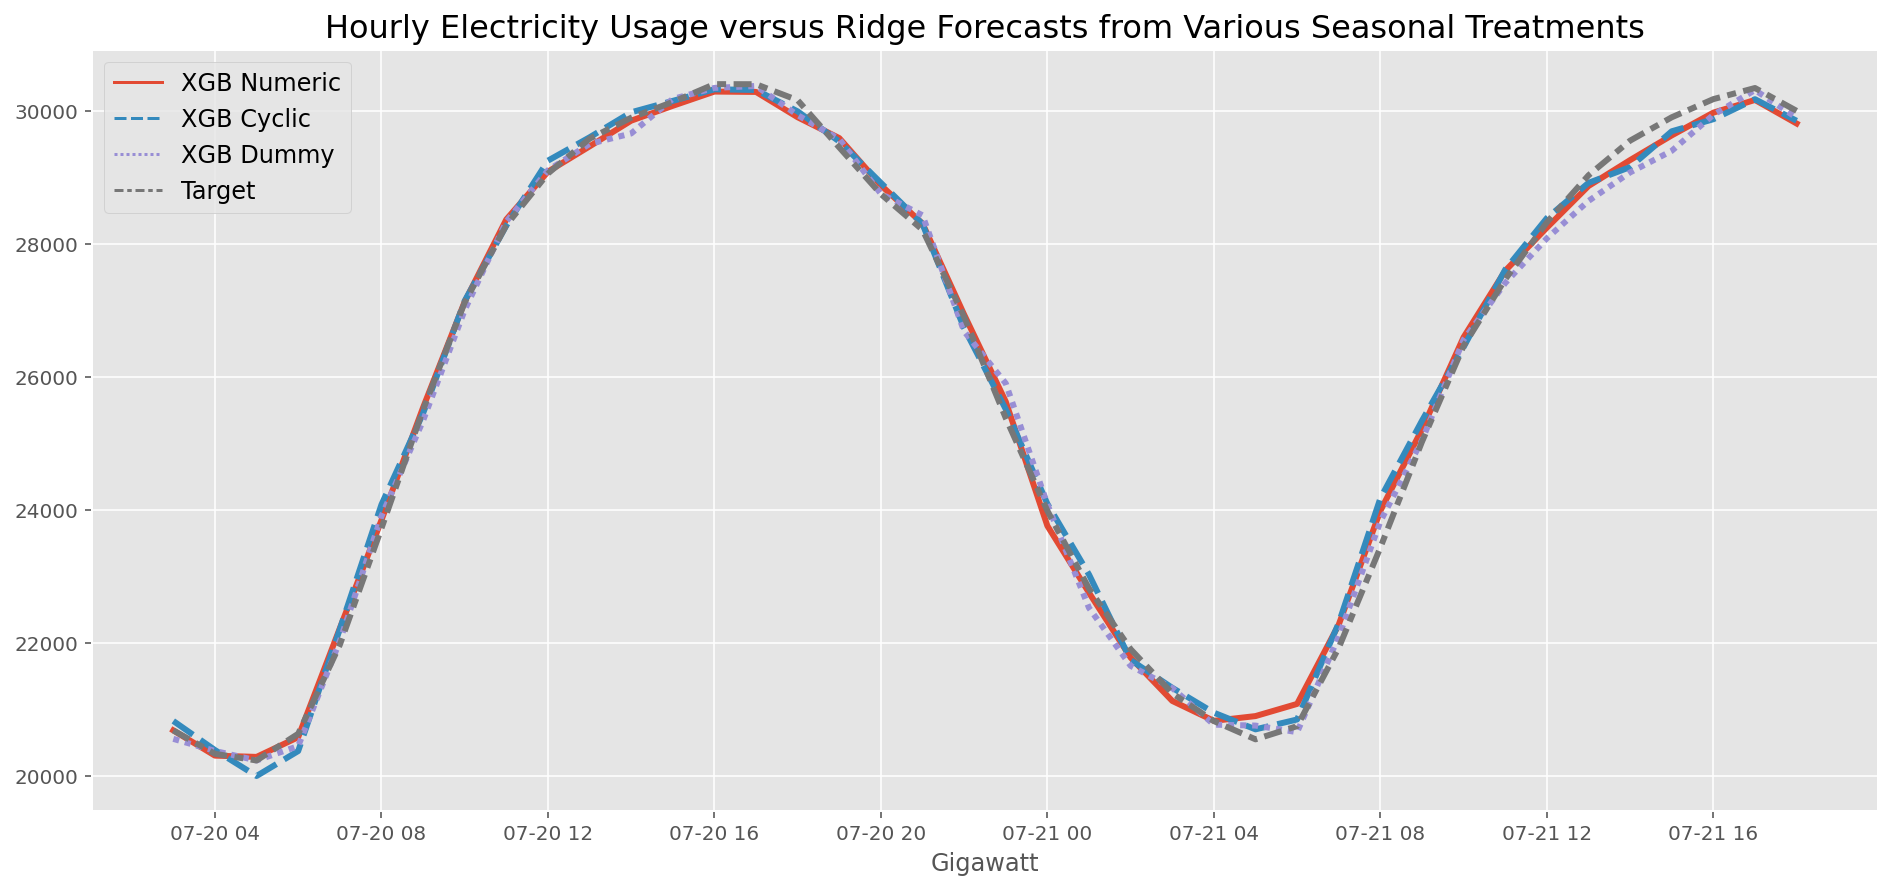

In [21]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['XGB Numeric', 'XGB Cyclic', 'XGB Dummy', 'Target']].iloc[3935:3975],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly Electricity Usage versus Ridge Forecasts from Various Seasonal Treatments', fontsize=16)
plt.xlabel('Gigawatt', fontsize=12);

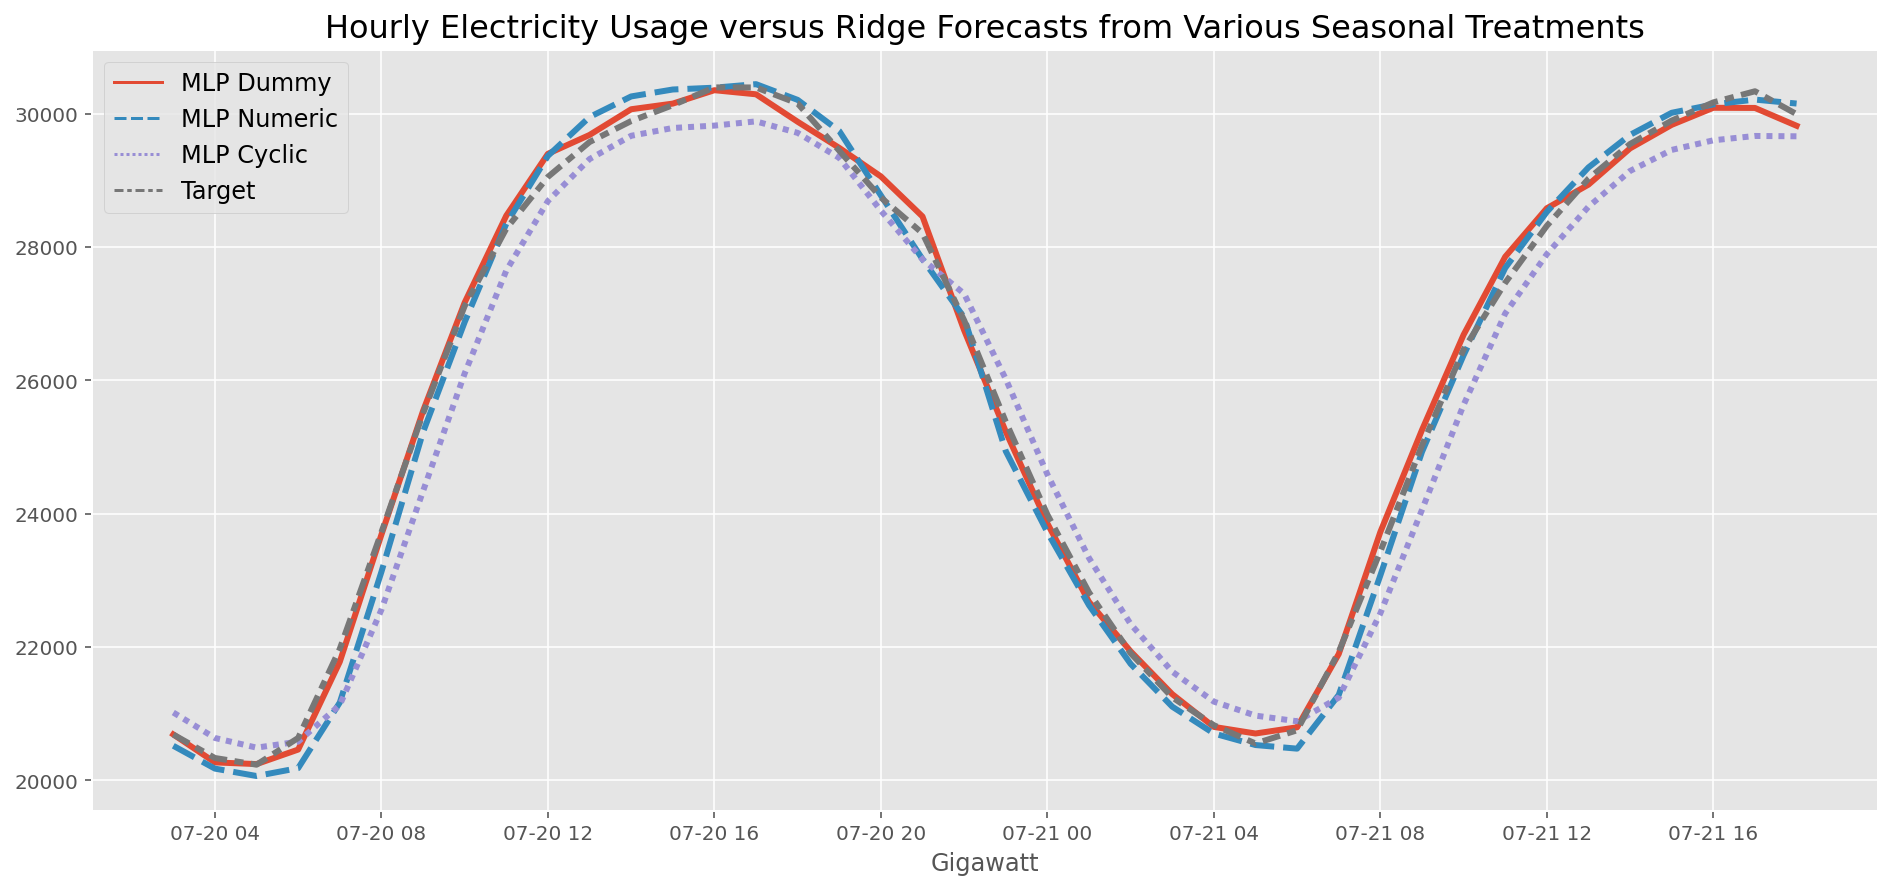

In [22]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['MLP Dummy', 'MLP Numeric', 'MLP Cyclic', 'Target']].iloc[3935:3975],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly Electricity Usage versus Ridge Forecasts from Various Seasonal Treatments', fontsize=16)
plt.xlabel('Gigawatt', fontsize=12);

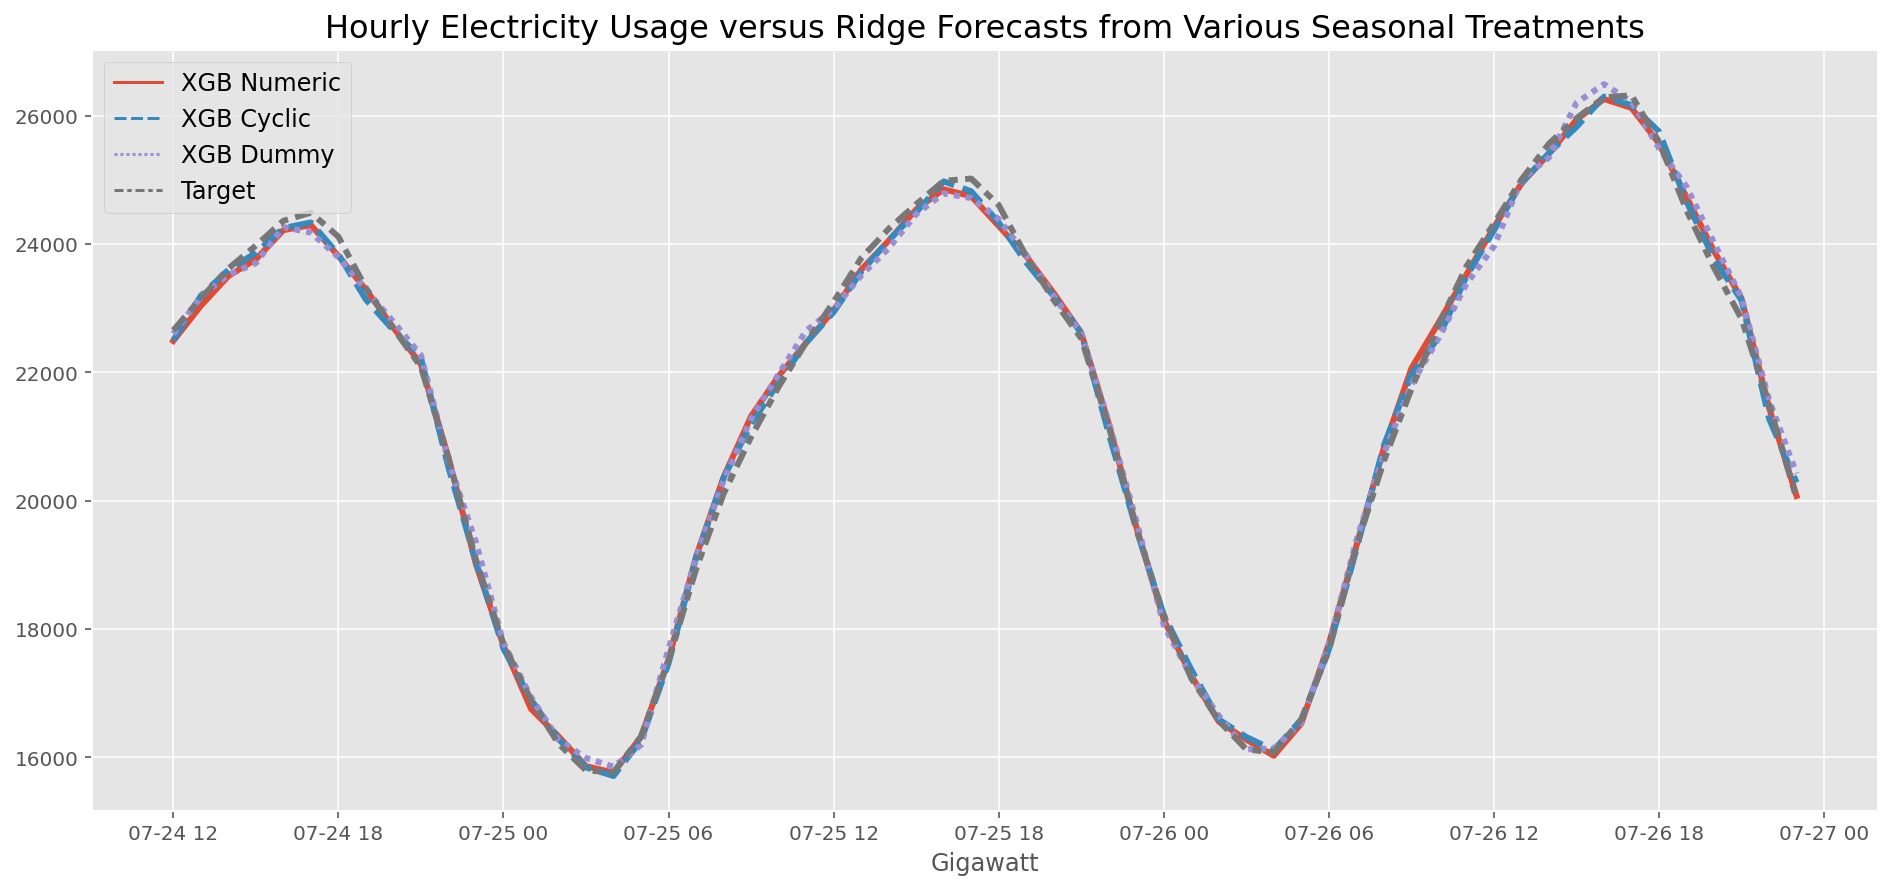

In [23]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['XGB Numeric', 'XGB Cyclic', 'XGB Dummy', 'Target']].iloc[4040:4100],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly Electricity Usage versus Ridge Forecasts from Various Seasonal Treatments', fontsize=16)
plt.xlabel('Gigawatt', fontsize=12);

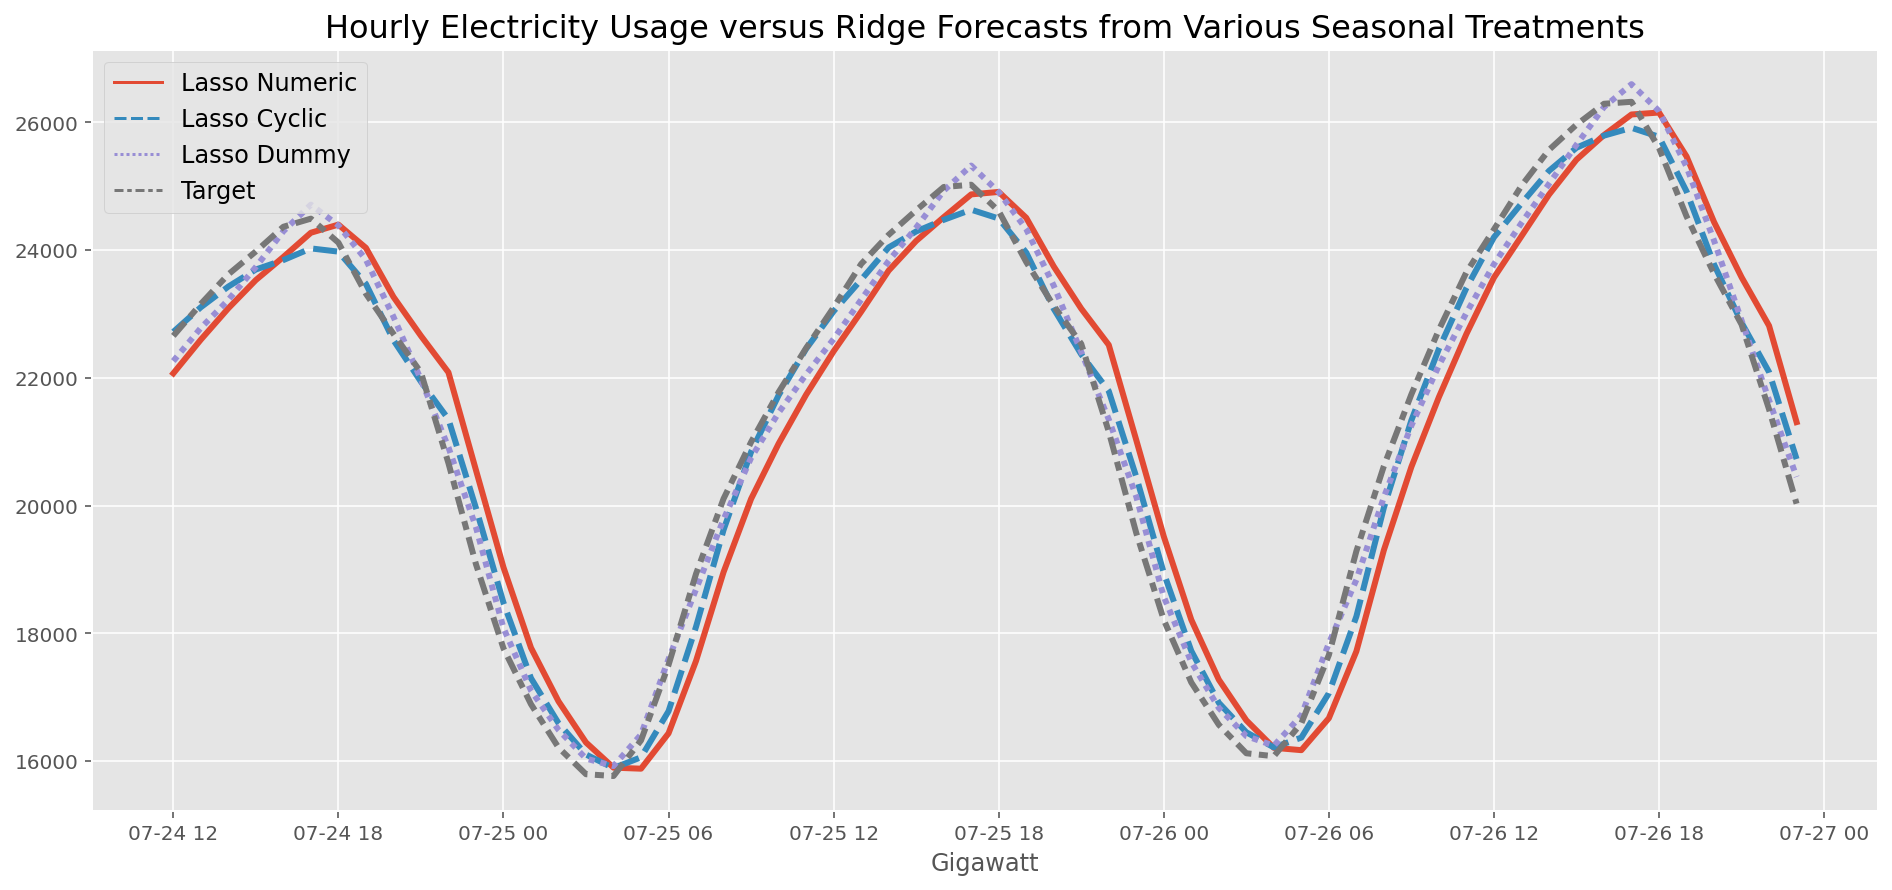

In [24]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['Lasso Numeric', 'Lasso Cyclic', 'Lasso Dummy', 'Target']].iloc[4040:4100],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly Electricity Usage versus Ridge Forecasts from Various Seasonal Treatments', fontsize=16)
plt.xlabel('Gigawatt', fontsize=12);

# Model Predictions vs True Values

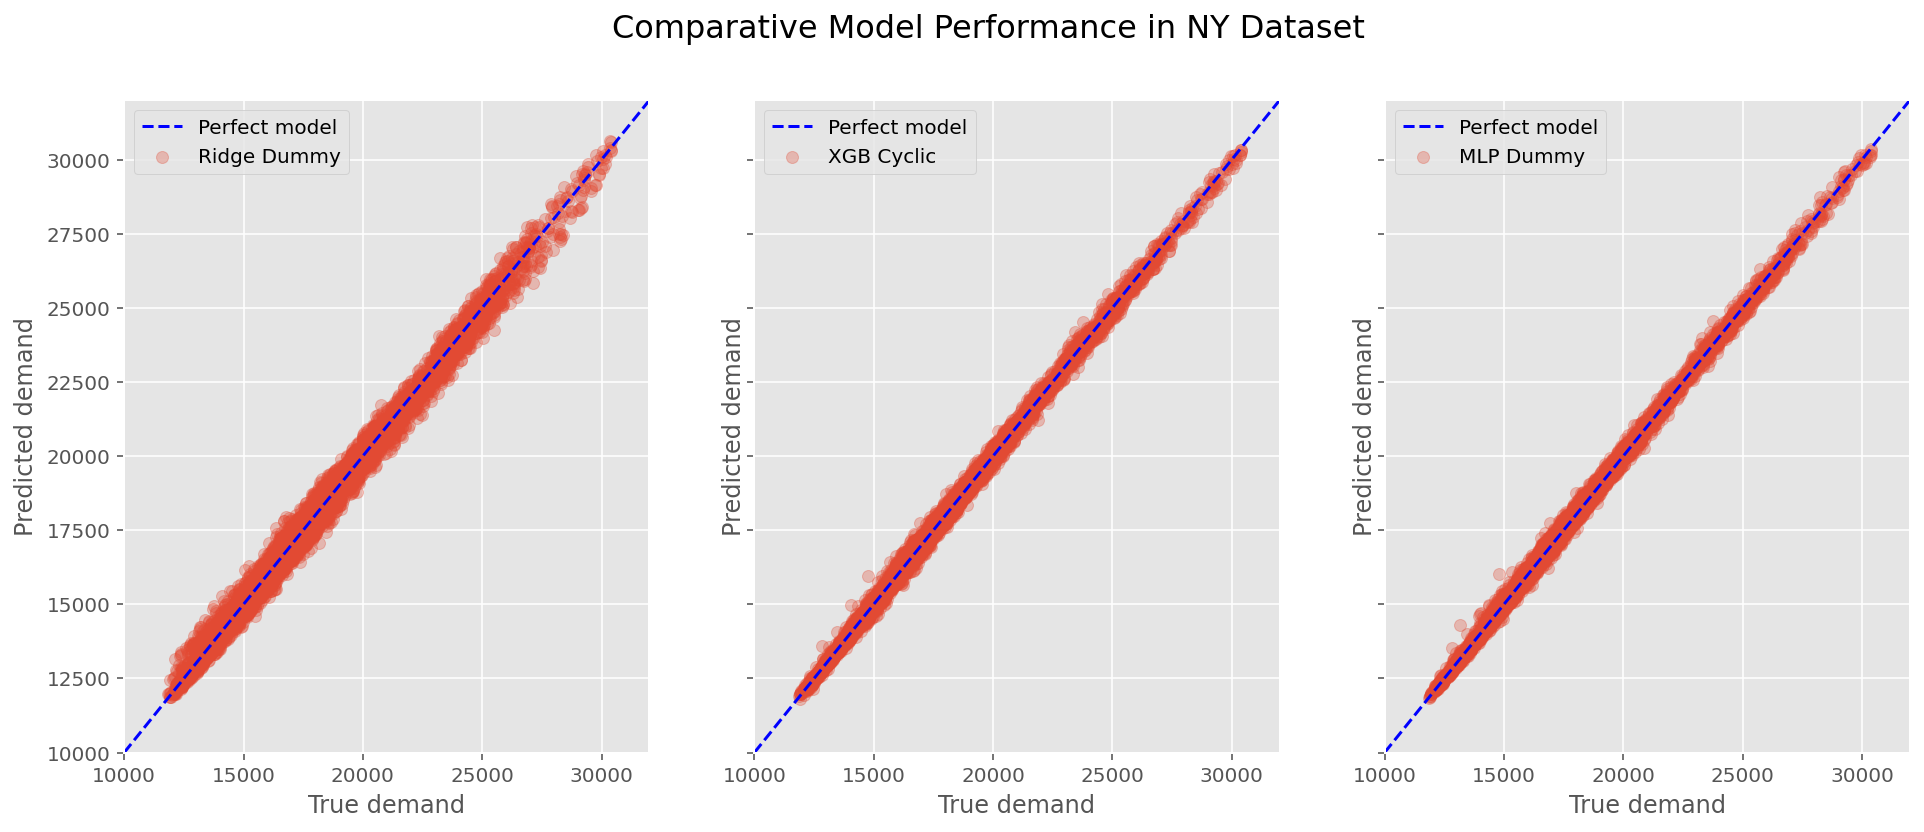

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.suptitle("Comparative Model Performance in NY Dataset", fontsize=16)
predictions = [
    df['Ridge Dummy'].to_list(),
    df['XGB Cyclic'].to_list(),
    df['MLP Dummy'].to_list(),
]
labels = [
    "Ridge Dummy",
    "XGB Cyclic",
    "MLP Dummy",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(df.Target.to_list(), pred, alpha=0.3, label=label)
    ax.plot([10000, 32000], [10000, 32000], "--", c='blue', label="Perfect model")
    ax.set(
        xlim=(10000, 32000),
        ylim=(10000, 32000),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()

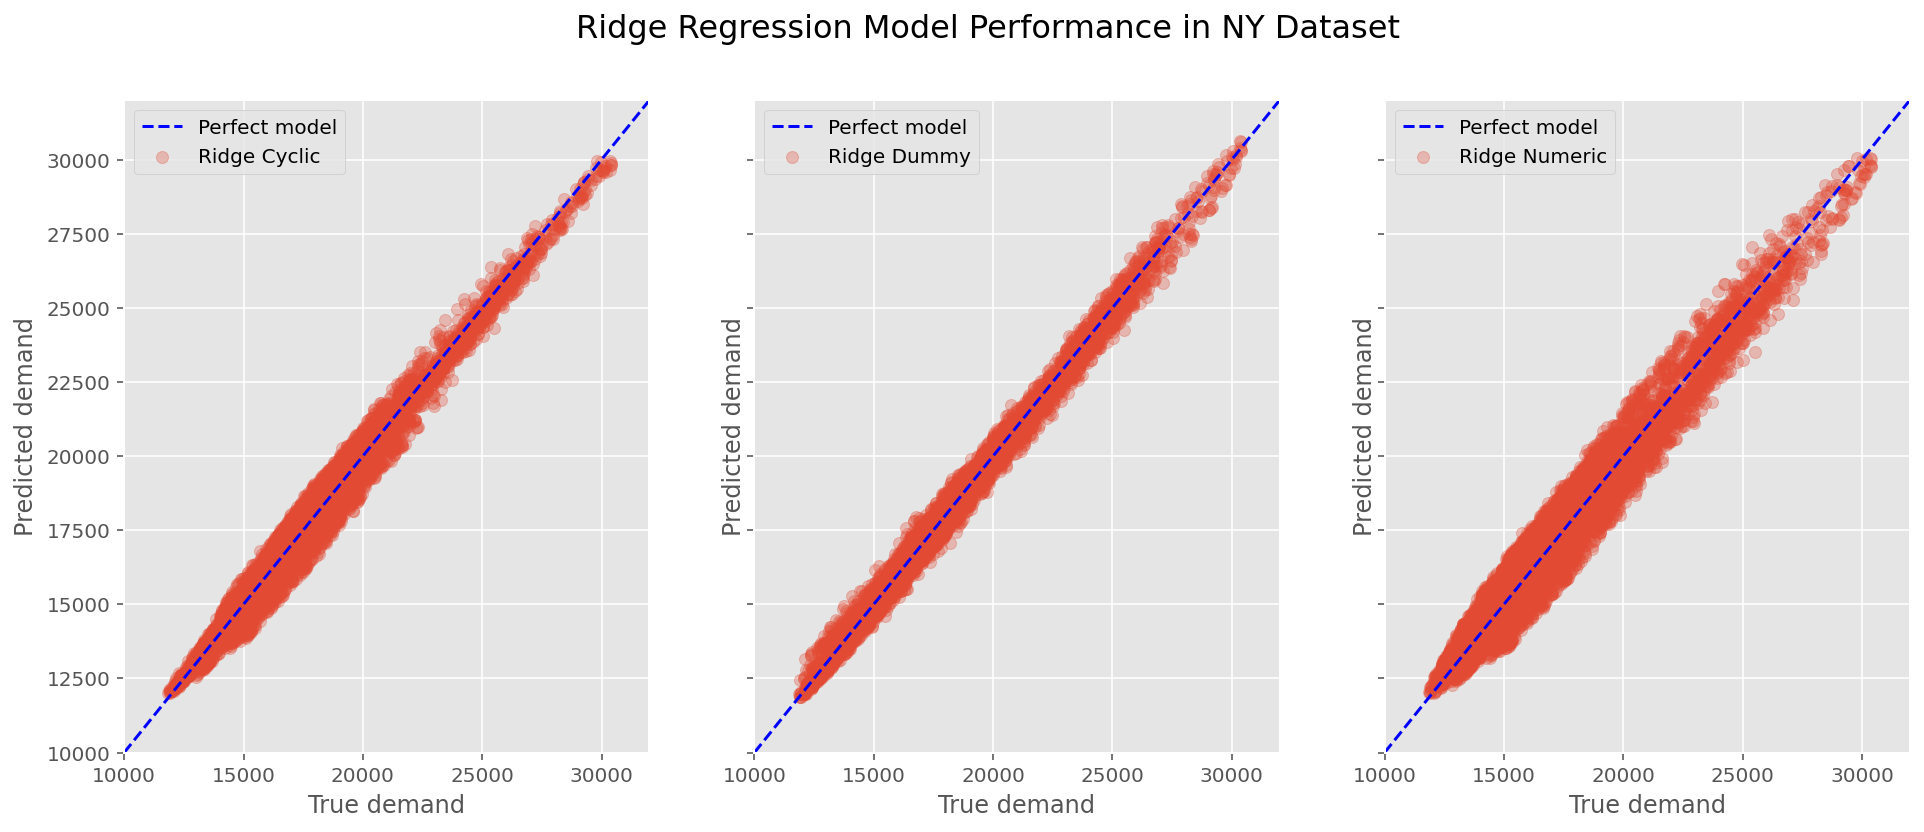

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.suptitle("Ridge Regression Model Performance in NY Dataset", fontsize=16)
predictions = [
    df['Ridge Cyclic'].to_list(),
    df['Ridge Dummy'].to_list(),
    df['Ridge Numeric'].to_list(),
]
labels = [
    "Ridge Cyclic",
    "Ridge Dummy",
    "Ridge Numeric",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(df.Target.to_list(), pred, alpha=0.3, label=label)
    ax.plot([10000, 32000], [10000, 32000], "--", c='blue', label="Perfect model")
    ax.set(
        xlim=(10000, 32000),
        ylim=(10000, 32000),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()


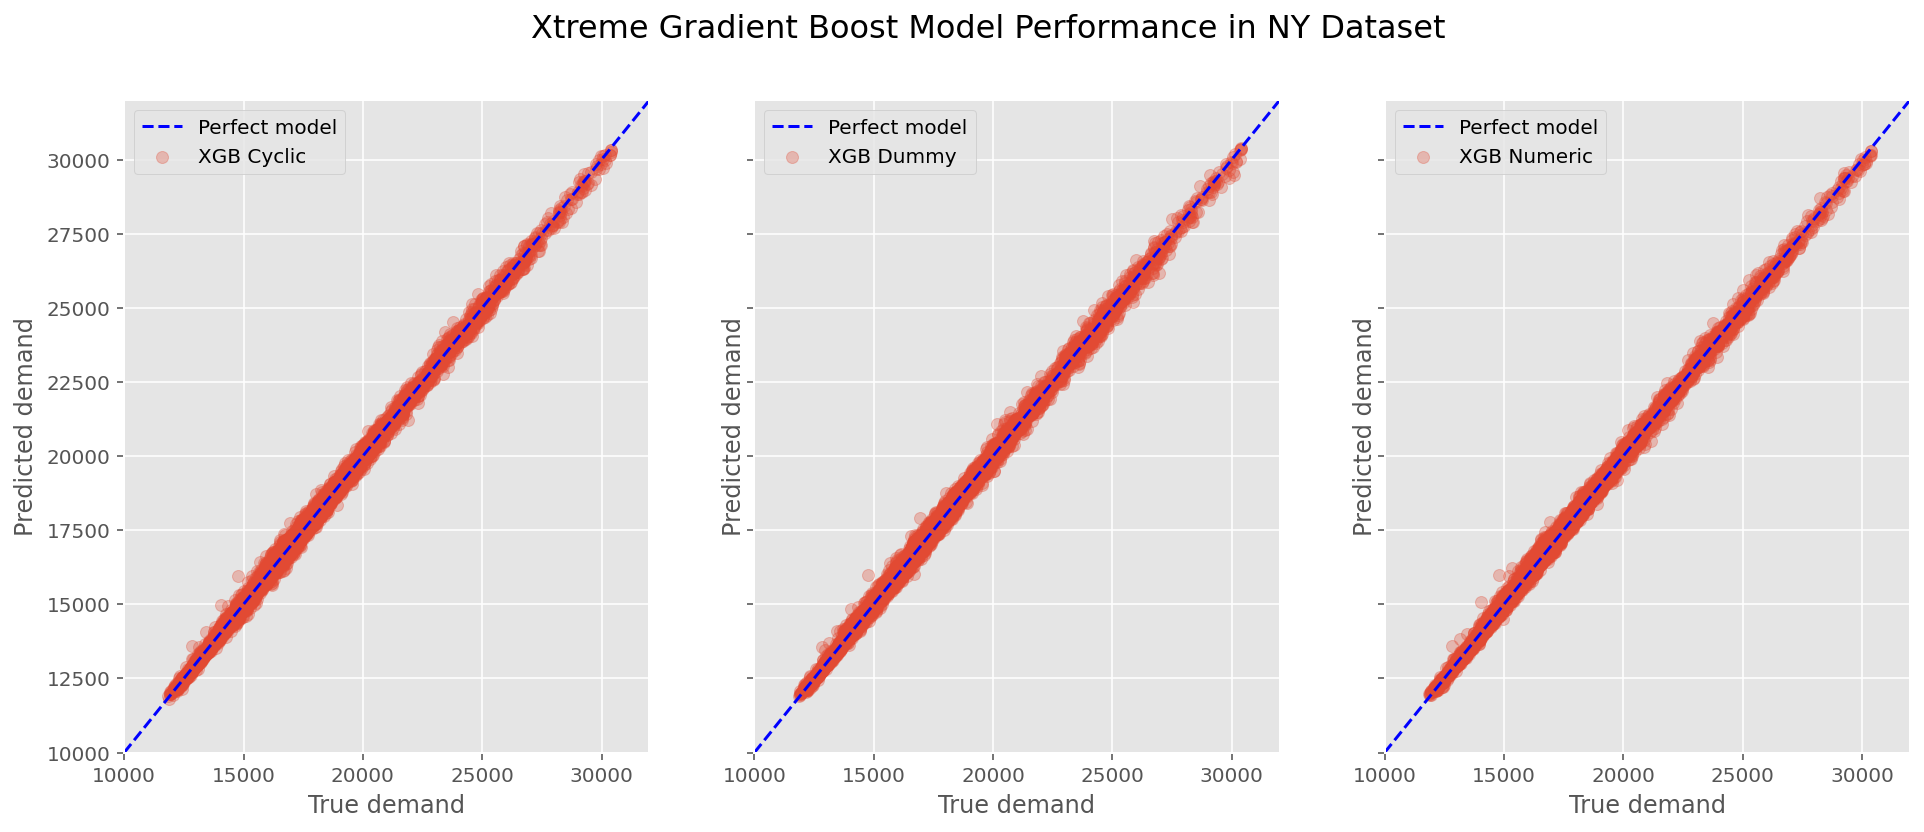

In [27]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.suptitle("Xtreme Gradient Boost Model Performance in NY Dataset", fontsize=16)
predictions = [
    df['XGB Cyclic'].to_list(),
    df['XGB Dummy'].to_list(),
    df['XGB Numeric'].to_list(),
]
labels = [
    "XGB Cyclic",
    "XGB Dummy",
    "XGB Numeric",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(df.Target.to_list(), pred, alpha=0.3, label=label)
    ax.plot([10000, 32000], [10000, 32000], "--", c='blue', label="Perfect model")
    ax.set(
        xlim=(10000, 32000),
        ylim=(10000, 32000),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()

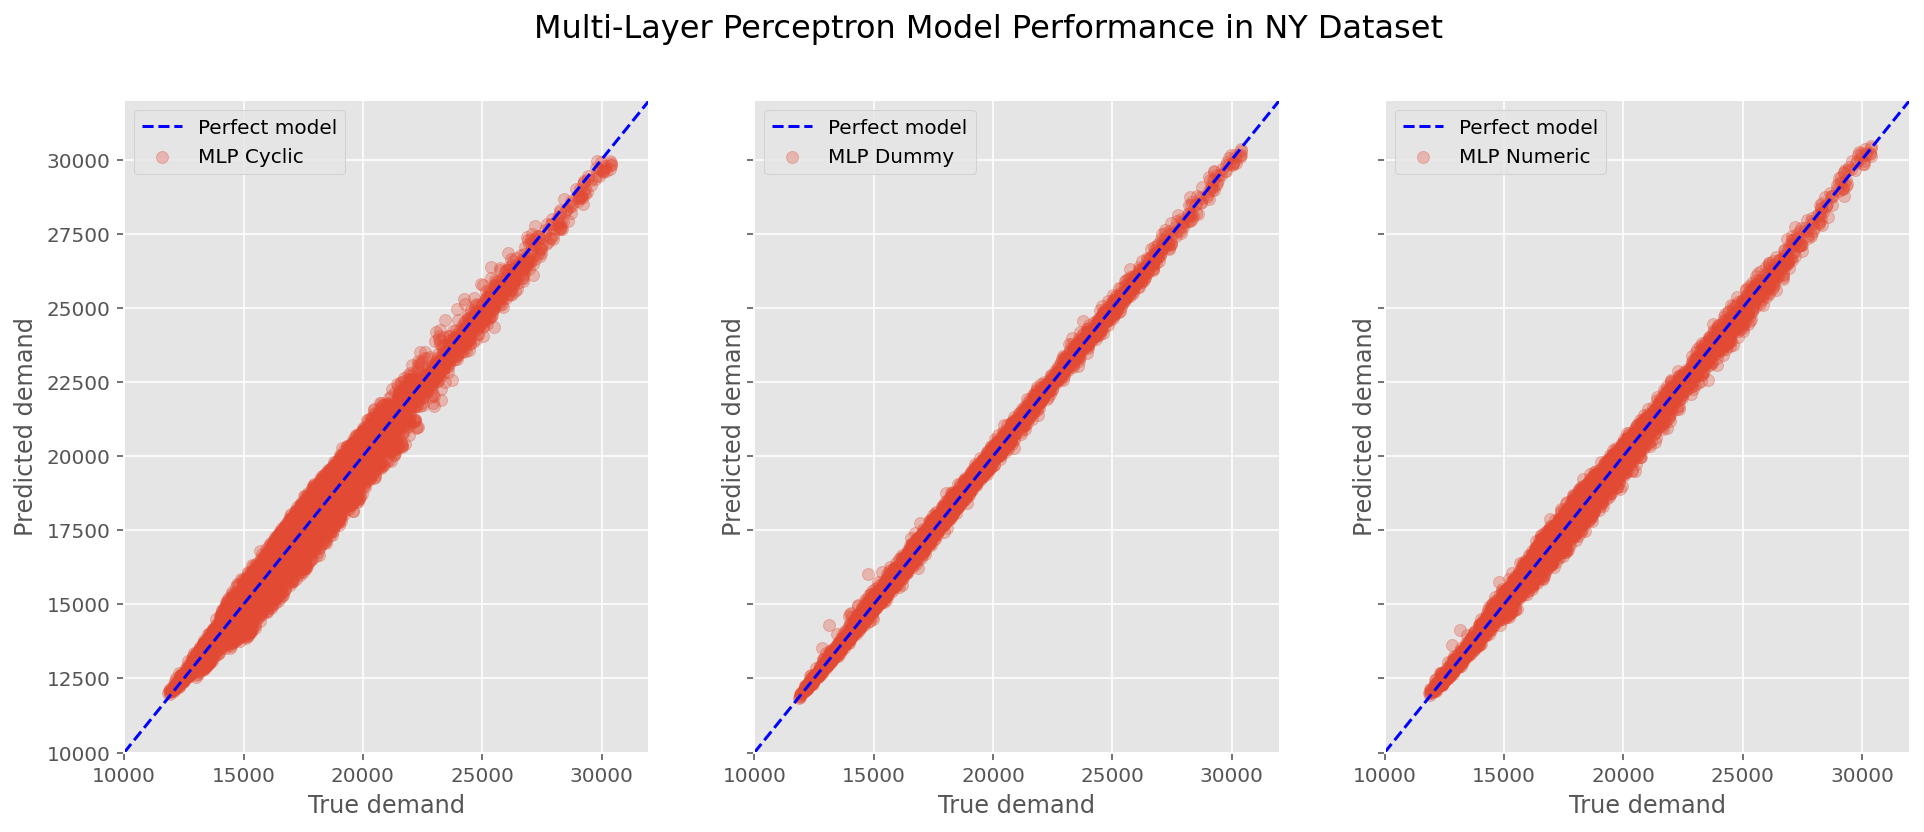

In [28]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.suptitle("Multi-Layer Perceptron Model Performance in NY Dataset", fontsize=16)
predictions = [
    df['MLP Cyclic'].to_list(),
    df['MLP Dummy'].to_list(),
    df['MLP Numeric'].to_list(),
]
labels = [
    "MLP Cyclic",
    "MLP Dummy",
    "MLP Numeric",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(df.Target.to_list(), pred, alpha=0.3, label=label)
    ax.plot([10000, 32000], [10000, 32000], "--", c='blue', label="Perfect model")
    ax.set(
        xlim=(10000, 32000),
        ylim=(10000, 32000),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()